# **Oficina 7**

Para o determinado dataset optei pela utilização do algoritmo **K-means** pois é um algoritmo fácil de implementar e rápido para conjuntos de dados grandes, desde que a dimensionalidade não seja muito alta. Além disso, tem uma certa interpretação intuitiva ao análisar os cluster e tirar insights pois os clusters formados são representados por centros, o que facilita a análise e interpretação dos resultados. Contudo, utilizar este algoritmo requer alguns desafios como descobrir o número ideal de clusters, neste dataset o método do cotovelo não teve um "ponto de cotovelo" tão claro. Além deste desafio, neste contexto, utilizar o K-means pode não ser eficaz se os dados formarem clusters com formas complexas ou tamanhos variados já que o K-Means assume que os clusters têm uma forma esférica e tamanhos semelhantes.

Os clusters que foram formados podem gerar insights importantes, como por exemplo, grupos divididos em **clientes moderados**, **clientes menos engajados** e **clientes premium**, pois ao analisar o gráfico de scatter podemos ver claramente um grupo de clientes que compram de forma moderada e gastam de forma moderada (amarelo), clientes que compram pouco e gastam pouco (roxo) e cliente que compram pouco mas gastam muito (azul claro)

In [64]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans



# Gerando o dataset sintético



np.random.seed(0)

n_samples = 300



data = {

    'valor_medio_gasto': np.random.randn(n_samples) * 20 + 200,

    'frequencia_compras': np.random.randn(n_samples) * 5 + 15,

    'categorias_produtos': np.random.randn(n_samples) * 2 + 8

}



df = pd.DataFrame(data)

In [65]:
df.head()

,valor_medio_gasto,frequencia_compras,categorias_produtos
0,235.281047,8.467366,4.899141
1,208.003144,23.290653,8.834638
2,219.574760,14.409180,6.111263
3,244.817864,11.599109,8.476206
4,237.351160,18.331915,5.188074


In [66]:
df.isnull().sum()

,0
valor_medio_gasto,0
frequencia_compras,0
categorias_produtos,0


In [67]:
df.duplicated().sum()

0

In [68]:
from sklearn.preprocessing import MinMaxScaler
X = df
cols = X.columns

normalized = MinMaxScaler()

X = normalized.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])


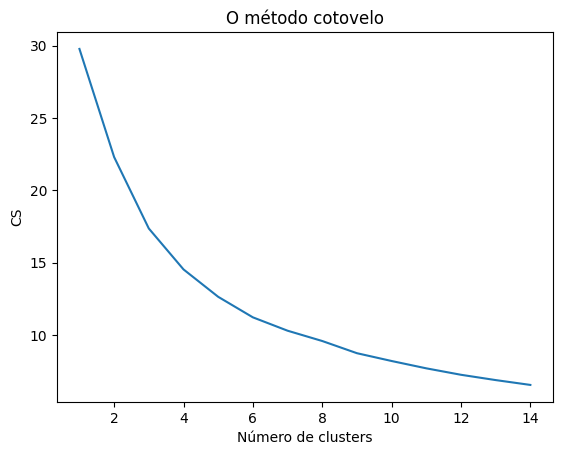

In [69]:
from sklearn.cluster import KMeans

cs = []

for i in range(1, 15):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init = 10 , random_state = 0)
  kmeans.fit(X)
  cs.append(kmeans.inertia_)

plt.plot( range ( 1 , 15 ), cs)
plt.title( 'O método cotovelo' )
plt.xlabel( 'Número de clusters' )
plt.ylabel( 'CS' )
plt.show()

In [70]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [71]:
df = df.copy()

df['Cluster'] = kmeans.predict(X)

df.head()

,valor_medio_gasto,frequencia_compras,categorias_produtos,Cluster
0,235.281047,8.467366,4.899141,1
1,208.003144,23.290653,8.834638,2
2,219.574760,14.409180,6.111263,1
3,244.817864,11.599109,8.476206,1
4,237.351160,18.331915,5.188074,1


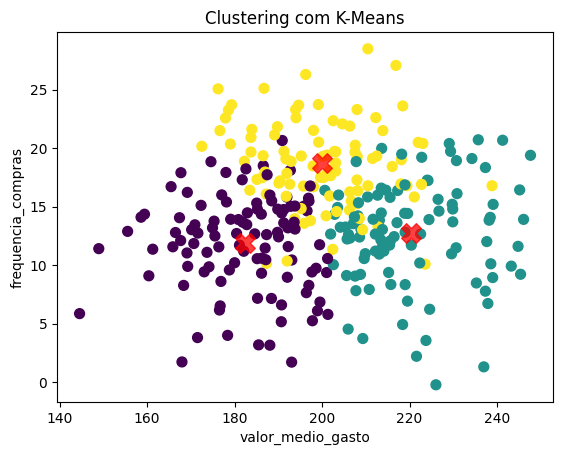

In [72]:
import matplotlib.pyplot as plt

centers = normalized.inverse_transform(kmeans.cluster_centers_)

plt.scatter(df['valor_medio_gasto'], df['frequencia_compras'], c=df['Cluster'], s=50, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='X')

plt.title('Clustering com K-Means')
plt.xlabel('valor_medio_gasto')
plt.ylabel('frequencia_compras')
plt.show()



In [73]:
df.head(20)

,valor_medio_gasto,frequencia_compras,categorias_produtos,Cluster
0,235.281047,8.467366,4.899141,1
1,208.003144,23.290653,8.834638,2
2,219.574760,14.409180,6.111263,1
3,244.817864,11.599109,8.476206,1
4,237.351160,18.331915,5.188074,1
5,180.454442,12.696401,6.819885,0
6,219.001768,8.328708,7.779021,1
7,196.972856,8.266412,4.678600,0
8,197.935623,18.468866,8.230296,2
9,208.211970,14.202133,7.241705,1


In [74]:
nomes_cluster = {
    0 : 'Clientes Menos Engajados',
    1 : 'Clientes Premium',
    2 : 'Clientes Moderados'
}


df['Cluster'] = df['Cluster'].map(nomes_cluster)

df.head()

,valor_medio_gasto,frequencia_compras,categorias_produtos,Cluster
0,235.281047,8.467366,4.899141,Clientes Premium
1,208.003144,23.290653,8.834638,Clientes Moderados
2,219.574760,14.409180,6.111263,Clientes Premium
3,244.817864,11.599109,8.476206,Clientes Premium
4,237.351160,18.331915,5.188074,Clientes Premium
